In [14]:

from easydict import EasyDict as edict
import os

opt = edict({'savingroot':'../result','dataset':'CIFAR10', 'nc':3,'num_epoches':80,'p1':1.0,'p2':0.1})
print(opt)


    
def load_result(p1,p2):
    dataset_root = opt.dataset +'/'+ opt.dataset + '_' + str(p2)
    f = open(os.path.join(opt.savingroot,dataset_root,str(p1 * 100) + '%complementary/'  + 'acc.txt'), 'r')
    f_f = f.readlines()
    acc = []
    for line in f_f:
       acc.append(float(line.strip('\n')))
    f.close()
    
    f = open(os.path.join(opt.savingroot,dataset_root,str(p1 * 100) + '%complementary/' + 'acc_f_train.txt'), 'r')
    f_f = f.readlines()
    acc_f = []
    for line in f_f:
       acc_f.append(float(line.strip('\n')))
    f.close()
    return acc,acc_f

acc,acc_f = load_result(1.0,0.1)
# print(acc)
# print(acc_f)



{'savingroot': '../result', 'dataset': 'CIFAR10', 'nc': 3, 'num_epoches': 80, 'p1': 1.0, 'p2': 0.1}


In [15]:
p1_all=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
p1_all_reverse = [1.0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.0]
p2_all=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]


    

In [16]:
#load complementary accuracy which change with the proportion of ground truth label
p2 = 1.0
acc_c = []
acc_c_f = []
for p1 in p1_all_reverse:
    acc_c.append(load_result(p1,p2)[0][-1])
    acc_c_f.append(load_result(p1,p2)[1][-1])
print(acc_c)
print(acc_c_f)
acc0=acc_c
acc_f0 = acc_c_f

[0.6774, 0.7617, 0.8382, 0.867, 0.8854, 0.8975, 0.9067, 0.911, 0.9192, 0.9234, 0.9259]
[0.6571, 0.781, 0.7747, 0.7667, 0.8625, 0.8859, 0.8775, 0.897, 0.7598, 0.8343, 0.9006]


In [17]:
#load complementary accuracy which change with the proportion of unlabel label
p1 =1.0
acc_c = []
acc_c_f = []
for p2 in p2_all:
    if p2==0:
        acc_c.append(None)
        acc_c_f.append(None)
    else:
        acc_c.append(load_result(p1,p2)[0][-1])
        acc_c_f.append(load_result(p1,p2)[1][-1])
            
    
print(acc_c)
print(acc_c_f)
acc1=acc_c
acc_f1 = acc_c_f

[None, 0.2196, 0.3187, 0.407, 0.4657, 0.5243, 0.5623, 0.6008, 0.6045, 0.6449, 0.6774]
[None, 0.2494, 0.3953, 0.4818, 0.4765, 0.5743, 0.605, 0.6393, 0.6596, 0.668, 0.6571]


In [18]:
#load ground truth accuracy which change with the total traing ground truth data
p1 =0.0
acc_c = []
acc_c_f = []
for p2 in p2_all:
    try:
        if p2==0:
            acc_c.append(None)
            acc_c_f.append(None)
        else:
            acc_c.append(load_result(p1,p2)[0][-1])
            acc_c_f.append(load_result(p1,p2)[1][-1])
    except:
        acc_c.append(None)
        acc_c_f.append(None)
print(acc_c)
print(acc_c_f)
acc2=acc_c
acc_f2 = acc_c_f

[None, 0.7521, 0.8301, 0.8624, 0.876, 0.8934, 0.8995, 0.9103, 0.9186, 0.9277, 0.9259]
[None, 0.7649, 0.7888, 0.8469, 0.8404, 0.8524, 0.8878, 0.8949, 0.8811, 0.8856, 0.9006]


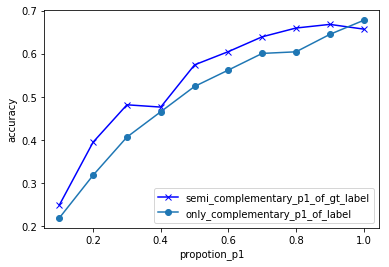

In [19]:
import matplotlib.pyplot as plt
beingsaved = plt.figure()
plt.plot(p2_all,acc_f1,'xb-',label='semi_complementary_p1_of_gt_label')
plt.plot(p2_all,acc1,'o-',label='only_complementary_p1_of_label')
# plt.plot(p2_all,acc0,'*-',label='mix_complementary_p_of_oridnary_label')
# plt.plot(p2_all,acc2,'*--',label='only_oridnary_label_p_of_gt_label')
plt.ylabel('accuracy')
plt.xlabel('propotion_p1')
plt.legend()
# plt.show()
beingsaved.savefig(opt.dataset+'p1.eps', format='eps', dpi=1000)

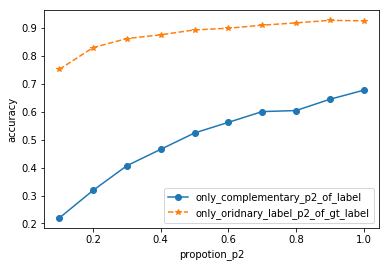

In [20]:
import matplotlib.pyplot as plt
beingsaved = plt.figure()
# plt.plot(p2_all,acc_f1,'xb-',label='semi_complementary_p_of_gt_label')
plt.plot(p2_all,acc1,'o-',label='only_complementary_p2_of_label')
# plt.plot(p2_all,acc0,'*-',label='mix_complementary_p_of_oridnary_label')
plt.plot(p2_all,acc2,'*--',label='only_oridnary_label_p2_of_gt_label')
plt.ylabel('accuracy')
plt.xlabel('propotion_p2')
plt.legend()
# plt.show()
beingsaved.savefig(opt.dataset+'p2.eps', format='eps', dpi=1000)